In [1]:
from pathlib import Path

import h5py

from source.helper import to_dB, print_spectogram, gen_spectogram, diff_frames, \
                          get_argmaxed_spectrogram, get_tresholded_spectogram, get_spectrogram_metrics, plot_metrics

In [2]:
BASE_DIR = Path("E:/radar-project/data")  # change to your project dir

loaded_file = h5py.File(BASE_DIR / 'complete_dataset.h5', 'r') # best to make yourself a h5 file containing complete dataset

In [3]:
loaded_file['2023_03_21'].keys()

<KeysViewHDF5 ['background', 'bartek_sciana', 'biegunko_1os_2m_rafal', 'chodzonko_1os_2m_bartek', 'chodzonko_1os_4-1-8m_bartek', 'chodzonko_2os_2m_bartek_3m_oskar', 'chodzonko_2os_2m_oskar_3m_bartek', 'odleglosc_1m_bartek_bokiem', 'odleglosc_1m_bartek_przodem', 'odleglosc_2m_bartek_bokiem', 'odleglosc_2m_bartek_przodem', 'odleglosc_3m_bartek_bokiem', 'odleglosc_3m_bartek_przodem', 'odleglosc_4m_bartek_bokiem', 'odleglosc_4m_bartek_przodem', 'randomowe_chodzonko_1os_bartek', 'randomowe_chodzonko_3os', 'wiatrak_1m', 'wiatrak_2m', 'wiatrak_2m_bartek_sciana', 'wiatrak_3m', 'wiatrak_4m', 'wysoki_niski_3m_oskar_bartek_przodem']>

In [4]:
sample_file = loaded_file['2023_03_21']['chodzonko_1os_4-1-8m_bartek']
sample_file = sample_file[:, 0, 0, :]

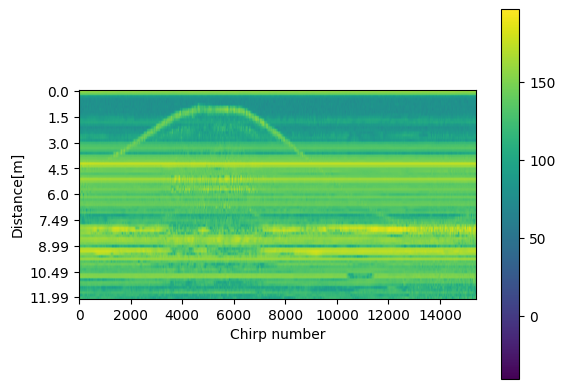

In [5]:
normal_spect, y = gen_spectogram(sample_file)
normal_spect = to_dB(normal_spect)
print_spectogram(normal_spect, y, depth_limit=12)

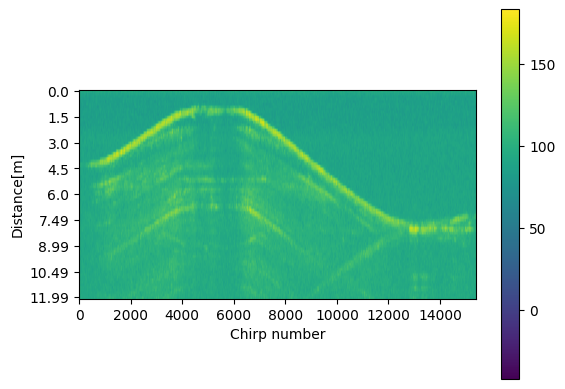

In [6]:
frames_diff = diff_frames(sample_file, 1)  #odejmujemy ostatnią klatkę
diff_spect, y = gen_spectogram(frames_diff)
diff_spectdb = to_dB(diff_spect)
print_spectogram(diff_spectdb, y, depth_limit=12)

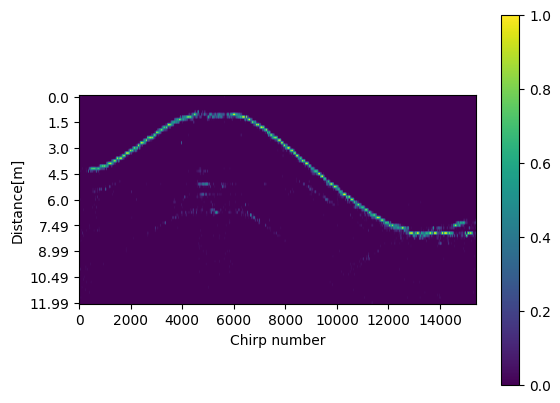

In [7]:
argmax_spectrogram = get_argmaxed_spectrogram(diff_spectdb) # this returns spectrogram with 1 at argmax, else 0
print_spectogram(argmax_spectrogram, y, depth_limit=12)

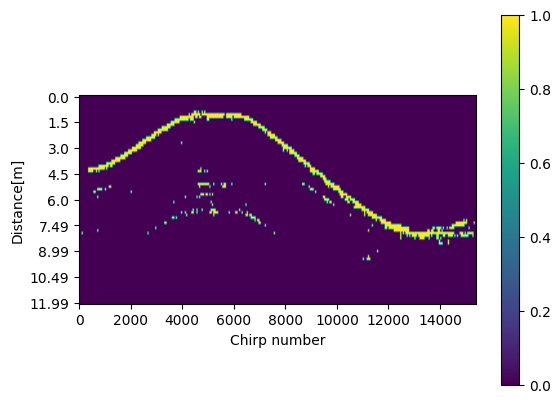

In [8]:
modded_spectrogram = get_tresholded_spectogram(base_spectrogram=normal_spect,
                                               argmaxed_spectrogram=argmax_spectrogram,
                                               y_step=50,
                                               x_step=1,
                                               ones_treshold=0.05)

print_spectogram(modded_spectrogram, y, depth_limit=12) # this fixes the missing values in the middle part

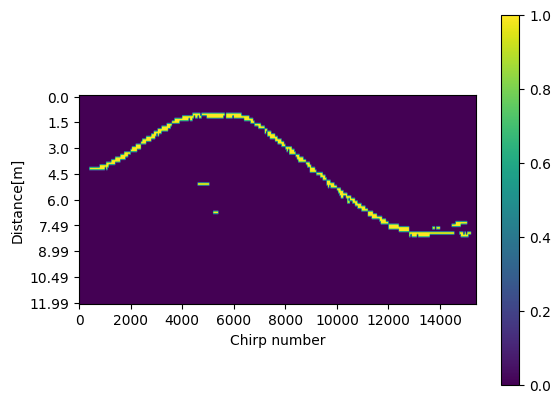

In [9]:
filtered_spectrogram = get_tresholded_spectogram(modded_spectrogram, argmax_spectrogram, 400, 1, 0.12) # additional tresholding filters out some noise
print_spectogram(filtered_spectrogram, y, depth_limit=12)

E:\radar-project\source\helper.py:122: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  box_skew = [np.nan_to_num(scipy.stats.skew(box)) for box in box_list]
E:\radar-project\source\helper.py:123: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  box_kurt = [np.nan_to_num(scipy.stats.kurtosis(box)) for box in box_list]


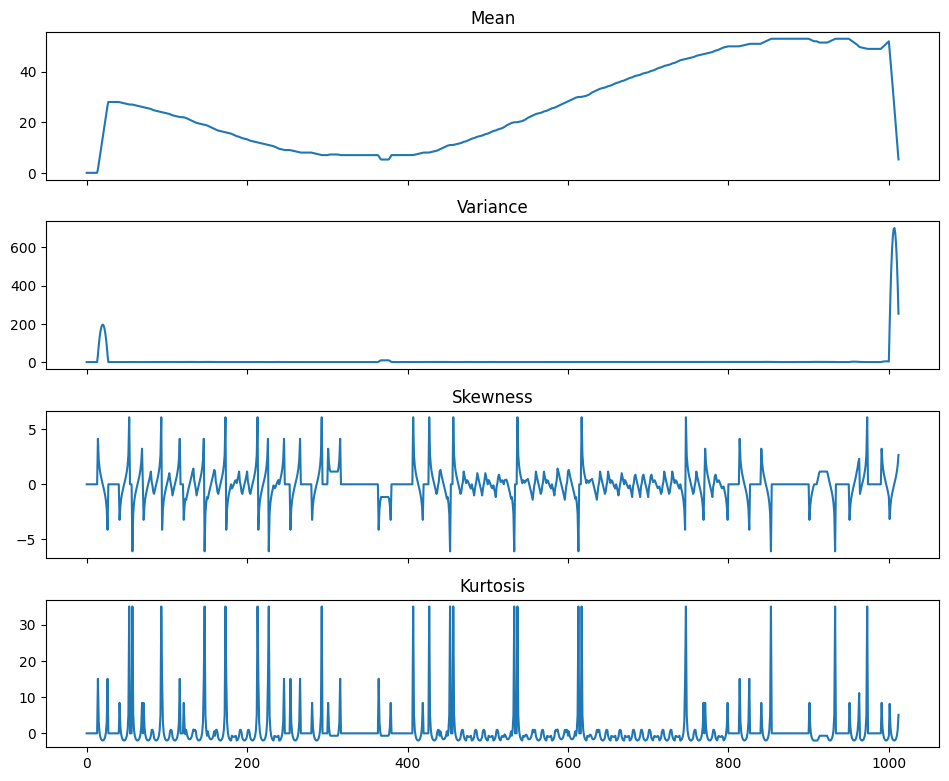

In [10]:
means, variations, skew, kurt = get_spectrogram_metrics(filtered_spectrogram, number_of_boxes=1000, window_size=100)
plot_metrics(means, variations, skew, kurt)